# Bio body Signals for Smoking
Neuarl netoerk,Svm, random forest


Accuracy
Confusion Matrix
Precision & Recall
F1 Score
ROC & AUC
Log-Loss
Coefficient of determination.

Imports

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
dataset_file = "../Dataset/smoking.csv"
df = pd.read_csv(dataset_file)
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


reading csv file and making dataset easier to understand

In [3]:
dataset_file = "../Dataset/smoking.csv"
df = pd.read_csv(dataset_file)

pd.set_option('display.max_columns', None)
print(df.head())



# added the full name of the abbreviations, so we know what they stand for.
df = df.rename(columns={'HDL':' HDL : high-density lipoprotein', 'LDL': 'LDL : Low-density lipoprotein',
                        'AST':'AST : Aspartate aminotransferase', 'ALT': 'ALT : Aspartate aminotransferase',
                        'Gtp': 'GTP : Guanosine triphosphate'})

print("List of all the columns\n")
print("Columns:")
for column in df.columns:
    print(column)
print("\n")


# doing this will now allow me to know how/which data representation methods to use for certain features
print("Data types for each feature \n")

for column, dtype in zip(df.columns, df.dtypes):
    print(f"{column}: {dtype}")


   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              1.0            1.0             1.0     114.0        73.0   
1              0.6            1.0             1.0     119.0        70.0   
2              0.8            1.0             1.0     138.0        86.0   
3              1.5            1.0             1.0     100.0        60.0   
4              1.0            1.0             1.0     120.0        74.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0   

Data Cleaning

Missing values in each column:
 ID                                  0
gender                              0
age                                 0
height(cm)                          0
weight(kg)                          0
waist(cm)                           0
eyesight(left)                      0
eyesight(right)                     0
hearing(left)                       0
hearing(right)                      0
systolic                            0
relaxation                          0
fasting blood sugar                 0
Cholesterol                         0
triglyceride                        0
 HDL : high-density lipoprotein     0
LDL : Low-density lipoprotein       0
hemoglobin                          0
Urine protein                       0
serum creatinine                    0
AST : Aspartate aminotransferase    0
ALT : Aspartate aminotransferase    0
GTP : Guanosine triphosphate        0
oral                                0
dental caries                       0
tartar            

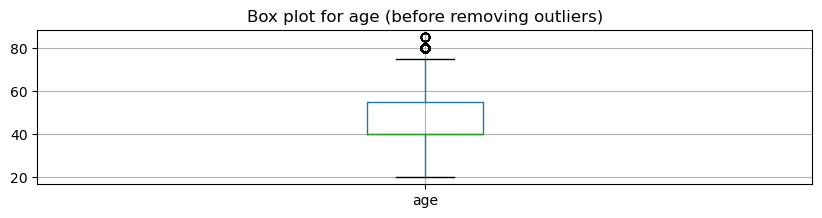

Detected outliers in age:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
44        54      F   80         145          55       92.0             0.1   
239      309      F   80         145          50       85.0             0.5   
312      396      M   80         160          60       87.0             1.0   
600      746      F   80         150          50       78.0             1.0   
720      898      M   80         170          55       69.0             1.2   
...      ...    ...  ...         ...         ...        ...             ...   
55061  52459      M   80         160          75       95.0             0.4   
55392  54169      M   80         165          70       95.0             1.2   
55521  54887      M   85         160          60       83.0             0.2   
55569  55076      M   80         155          50       73.5             0.7   
55623  55357      M   80         160          75       97.2             1.0   

       eyesight(right)  h

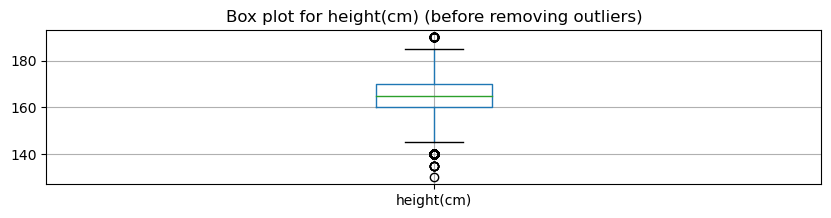

Detected outliers in height(cm):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
30        37      F   65         140          45       68.0             0.7   
57        68      M   30         190         100       94.1             0.6   
137      169      F   60         140          55       88.0             0.7   
414      523      F   55         140          50       78.5             0.9   
524      653      F   55         140          45       74.0             0.6   
...      ...    ...  ...         ...         ...        ...             ...   
54221  48421      F   60         140          40       69.0             0.4   
54273  48666      F   55         140          45       70.5             0.7   
54644  50539      F   60         140          45       79.0             0.8   
55102  52668      F   75         140          50       89.0             0.6   
55625  55360      M   35         190          85       80.0             1.0   

       eyesight(ri

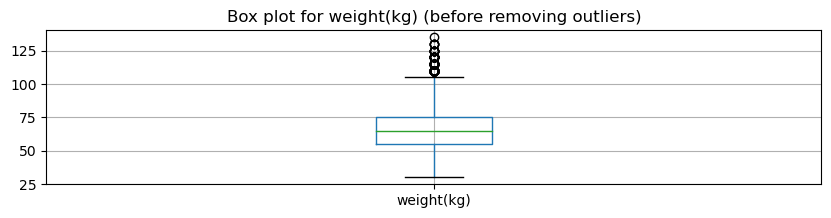

Detected outliers in weight(kg):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
545      678      M   30         185         110      108.0             1.0   
642      798      M   40         175         120      114.0             1.5   
1224    1543      M   30         175         110      104.0             1.0   
1382    1741      M   30         180         110      113.1             0.7   
1418    1785      M   35         180         110      105.0             0.8   
...      ...    ...  ...         ...         ...        ...             ...   
54115  47848      M   40         185         110      114.1             1.0   
54933  51863      M   30         180         110      113.1             0.7   
55034  52313      M   30         175         110      105.0             1.5   
55274  53598      M   20         175         110      110.0             0.7   
55591  55213      M   35         180         115      107.0             1.0   

       eyesight(ri

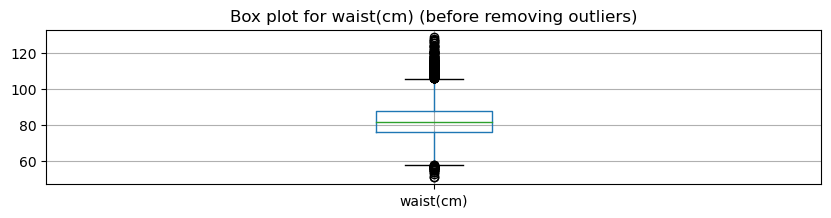

Detected outliers in waist(cm):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
14        15      F   45         165          75      108.0             1.2   
323      410      F   55         155          80      107.0             0.5   
433      543      M   45         170          95      107.0             0.9   
487      610      M   45         175         100      114.0             1.0   
545      678      M   30         185         110      108.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55541  54955      M   25         170         105      108.8             1.2   
55591  55213      M   35         180         115      107.0             1.0   
55604  55260      M   35         170          95      110.0             1.2   
55653  55465      M   30         175         105      108.0             1.5   
55671  55591      F   60         160          85      109.0             1.0   

       eyesight(rig

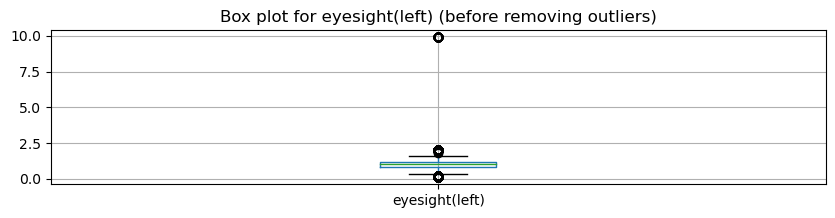

Detected outliers in eyesight(left):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
42        52      M   60         160          70       90.0             0.2   
44        54      F   80         145          55       92.0             0.1   
47        58      M   30         180          80       91.0             0.2   
78        97      M   60         170          85      103.2             0.2   
156      197      F   50         160          55       75.5             2.0   
...      ...    ...  ...         ...         ...        ...             ...   
55415  54323      F   40         160          60       80.0             2.0   
55469  54599      F   60         155          55       84.6             0.2   
55506  54819      M   40         180          80       92.5             0.2   
55521  54887      M   85         160          60       83.0             0.2   
55557  55034      M   45         180          85       92.5             0.2   

       eyesigh

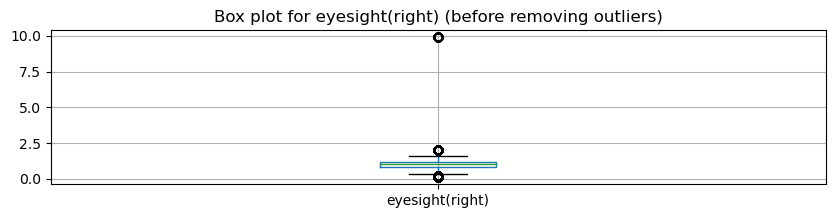

Detected outliers in eyesight(right):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
41        51      F   50         160          80       95.0             1.2   
42        52      M   60         160          70       90.0             0.2   
212      274      M   25         165          70       79.5             1.5   
230      299      M   75         160          60       90.0             0.3   
256      330      F   40         155          50       63.5             0.4   
...      ...    ...  ...         ...         ...        ...             ...   
55290  53661      F   40         155          50       72.0             1.2   
55336  53878      M   40         175          75       81.5             1.5   
55387  54145      F   75         150          65      108.0             0.1   
55509  54835      F   40         160          60       71.0             0.3   
55564  55056      F   60         150          55       86.2             1.0   

       eyesig

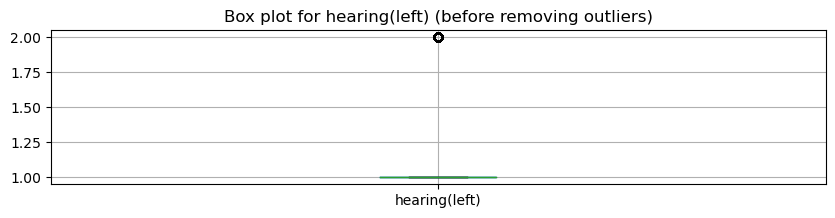

Detected outliers in hearing(left):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
44        54      F   80         145          55       92.0             0.1   
90       111      M   55         165          50       71.0             0.8   
141      175      F   60         145          55       76.5             0.4   
176      225      M   35         175          70       85.0             1.0   
213      278      M   40         160          70       81.0             0.6   
...      ...    ...  ...         ...         ...        ...             ...   
55479  54647      F   50         145          55       82.6             1.0   
55564  55056      F   60         150          55       86.2             1.0   
55623  55357      M   80         160          75       97.2             1.0   
55629  55372      F   55         155          45       68.0             0.4   
55657  55471      M   55         165          75       92.0             0.9   

       eyesight

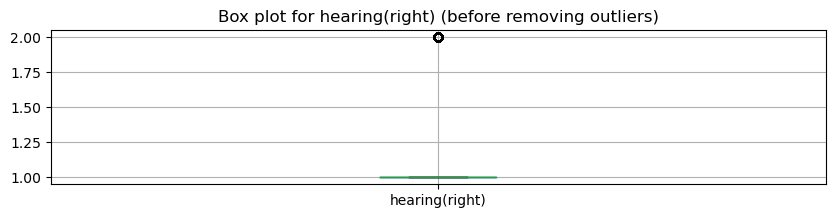

Detected outliers in hearing(right):
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
19        22      F   45         155          50       73.0             0.7   
44        54      F   80         145          55       92.0             0.1   
139      172      M   75         165          55       78.0             0.4   
213      278      M   40         160          70       81.0             0.6   
247      319      M   55         160          65       89.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55497  54716      F   65         155          60       85.7             0.4   
55564  55056      F   60         150          55       86.2             1.0   
55569  55076      M   80         155          50       73.5             0.7   
55657  55471      M   55         165          75       92.0             0.9   
55678  55627      M   50         160          65       83.7             0.9   

       eyesigh

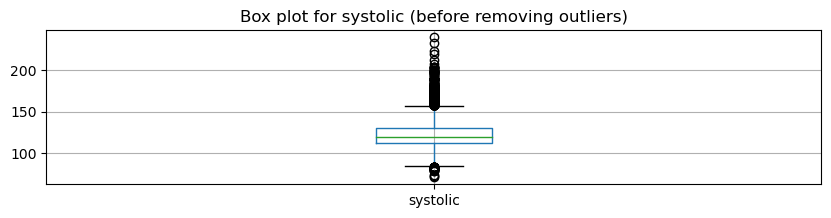

Detected outliers in systolic:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
94       117      F   50         150          60       84.0             0.6   
166      212      M   55         155          55       78.2             0.4   
270      346      F   40         160          50       72.0             1.2   
380      483      F   40         155          55       75.0             0.7   
451      567      M   55         155          50       76.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55330  53849      M   40         165          60       76.0             1.0   
55452  54507      M   40         170          90       99.2             0.9   
55471  54602      M   60         170          70       86.0             0.5   
55665  55534      F   55         150          50       75.0             1.0   
55674  55603      F   45         155          55       74.0             0.5   

       eyesight(righ

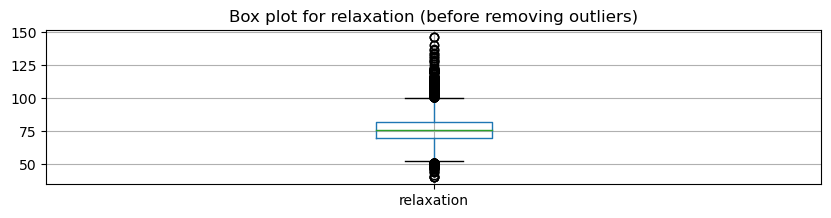

Detected outliers in relaxation:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
112      138      F   60         145          60       97.1             0.6   
192      250      F   45         155          50       68.0             0.6   
213      278      M   40         160          70       81.0             0.6   
270      346      F   40         160          50       72.0             1.2   
328      419      M   35         175          65       79.3             1.5   
...      ...    ...  ...         ...         ...        ...             ...   
55388  54146      M   40         165          80       98.9             1.2   
55452  54507      M   40         170          90       99.2             0.9   
55471  54602      M   60         170          70       86.0             0.5   
55593  55220      M   50         170          60       84.5             1.0   
55616  55342      F   40         165          50       67.0             0.9   

       eyesight(ri

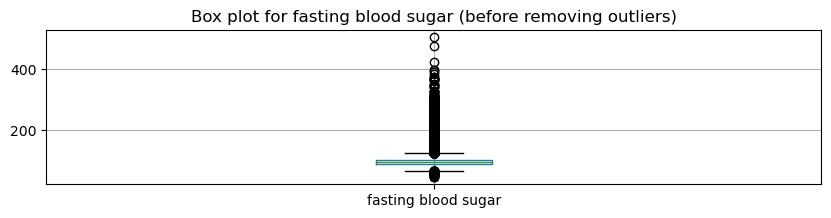

Detected outliers in fasting blood sugar:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
1          1      F   40         160          60       81.0             0.8   
7          7      M   45         165          90       96.0             1.2   
14        15      F   45         165          75      108.0             1.2   
24        31      M   45         175          80       91.0             1.0   
90       111      M   55         165          50       71.0             0.8   
...      ...    ...  ...         ...         ...        ...             ...   
55639  55409      M   35         180          85       97.2             1.2   
55641  55430      M   45         175          80       91.0             1.0   
55643  55436      M   60         170          50       79.0             0.7   
55653  55465      M   30         175         105      108.0             1.5   
55661  55487      M   60         170          55       77.0             0.7   

       ey

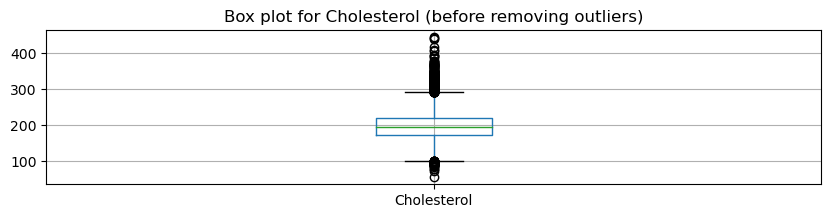

Detected outliers in Cholesterol:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
3          3      M   40         165          70       88.0             1.5   
115      141      M   60         165          65       87.0             0.6   
120      147      M   45         165          70       85.0             1.2   
291      371      F   50         155          55       74.9             1.0   
641      797      F   60         155          60       86.0             0.7   
...      ...    ...  ...         ...         ...        ...             ...   
55200  53175      F   55         155          50       75.0             0.4   
55219  53307      M   40         175          65       78.0             1.2   
55395  54194      M   40         160          80       99.2             1.5   
55481  54651      M   30         165          65       70.0             1.5   
55628  55366      F   55         155          55       77.0             0.8   

       eyesight(r

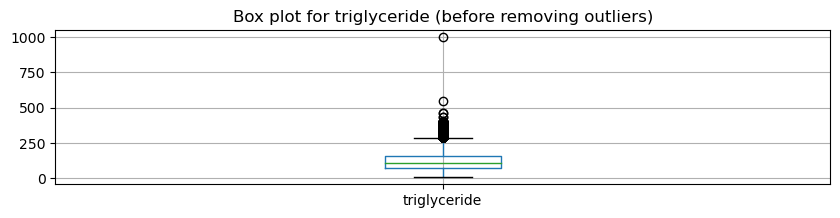

Detected outliers in triglyceride:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
17        19      M   35         165          70       87.5             1.0   
67        83      M   35         160          75       82.3             1.0   
94       117      F   50         150          60       84.0             0.6   
133      161      M   40         175          80       93.0             1.5   
144      178      M   40         180          80       85.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55498  54722      M   40         160          60       76.6             1.2   
55528  54905      F   40         160          65       82.0             1.0   
55542  54965      M   50         150          45       70.0             1.2   
55673  55596      M   75         155          45       68.0             0.6   
55678  55627      M   50         160          65       83.7             0.9   

       eyesight(

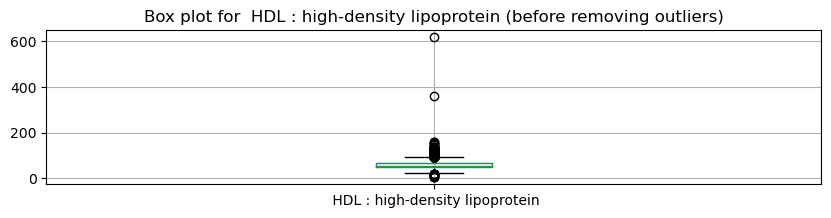

Detected outliers in  HDL : high-density lipoprotein:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
79        98      F   40         160          55       65.0             1.0   
109      135      F   45         155          50       62.0             0.7   
126      154      M   65         170          55       69.0             0.6   
270      346      F   40         160          50       72.0             1.2   
316      401      F   55         160          55       72.0             0.8   
...      ...    ...  ...         ...         ...        ...             ...   
55276  53613      F   40         160          50       65.0             0.5   
55332  53859      M   60         160          50       73.3             0.7   
55348  53925      F   45         150          50       78.0             0.7   
55450  54505      F   40         160          55       74.0             0.9   
55643  55436      M   60         170          50       79.0             0.7  

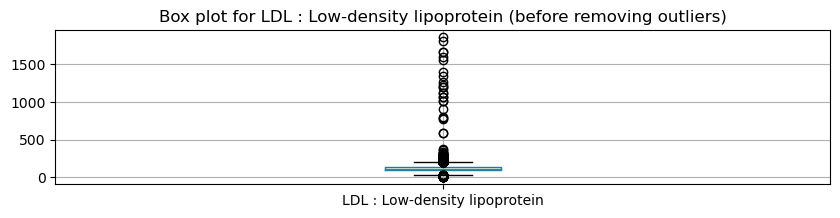

Detected outliers in LDL : Low-density lipoprotein:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
3          3      M   40         165          70       88.0             1.5   
115      141      M   60         165          65       87.0             0.6   
291      371      F   50         155          55       74.9             1.0   
470      586      M   40         175          75       89.0             1.2   
484      606      F   55         155          70       81.0             0.8   
...      ...    ...  ...         ...         ...        ...             ...   
55358  53986      M   60         160          65       85.4             0.5   
55395  54194      M   40         160          80       99.2             1.5   
55434  54432      M   30         165          60       77.4             1.5   
55436  54435      M   45         165          70       82.0             1.2   
55481  54651      M   30         165          65       70.0             1.5   


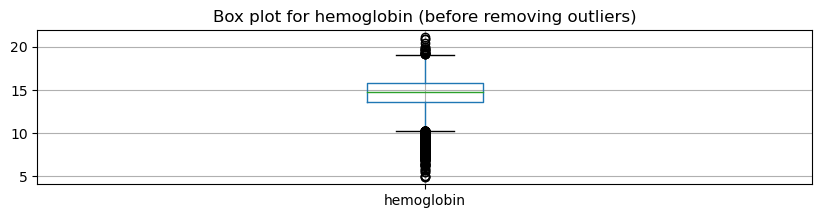

Detected outliers in hemoglobin:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
183      237      F   50         150          55       71.0             0.7   
299      380      F   45         160          80       82.0             1.5   
397      501      F   40         155          65       83.2             1.0   
482      604      F   40         155          50       67.9             1.2   
582      724      F   45         155          50       69.3             0.8   
...      ...    ...  ...         ...         ...        ...             ...   
55257  53531      F   40         165          65       74.0             1.2   
55431  54412      F   40         175          70       83.5             1.0   
55461  54558      F   40         155          45       59.0             1.0   
55467  54584      F   45         155          50       68.0             1.0   
55589  55203      F   45         155          50       71.0             0.9   

       eyesight(ri

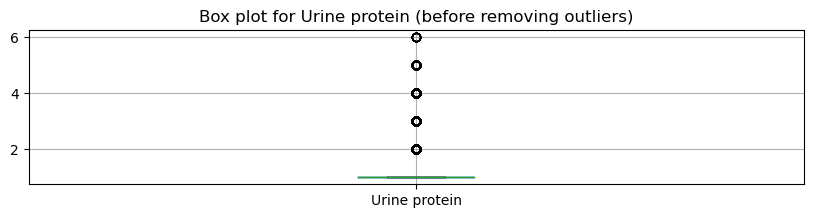

Detected outliers in Urine protein:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
22        28      M   55         175          60       75.0             1.0   
24        31      M   45         175          80       91.0             1.0   
41        51      F   50         160          80       95.0             1.2   
90       111      M   55         165          50       71.0             0.8   
104      129      F   55         145          45       73.0             0.7   
...      ...    ...  ...         ...         ...        ...             ...   
55627  55365      F   40         160          55       76.0             1.2   
55638  55407      M   35         170          85       88.0             0.4   
55641  55430      M   45         175          80       91.0             1.0   
55655  55467      F   40         170          50       64.0             1.2   
55657  55471      M   55         165          75       92.0             0.9   

       eyesight

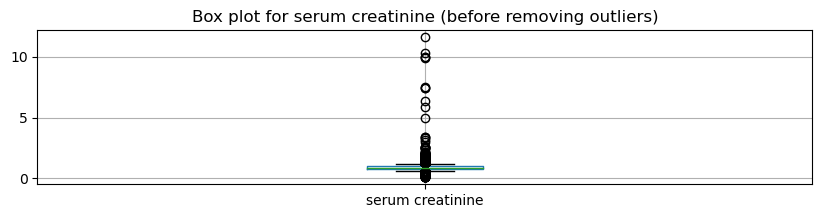

Detected outliers in serum creatinine:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
7          7      M   45         165          90       96.0             1.2   
31        38      M   55         180          75       80.0             0.8   
35        42      M   40         170          80       89.0             1.5   
44        54      F   80         145          55       92.0             0.1   
71        89      F   45         155          60       75.5             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55648  55451      M   40         170          80       95.0             1.2   
55663  55516      F   45         155          55       80.0             0.9   
55674  55603      F   45         155          55       74.0             0.5   
55683  55663      M   40         180          85       86.5             1.2   
55689  55683      F   55         160          50       68.5             1.0   

       eyesi

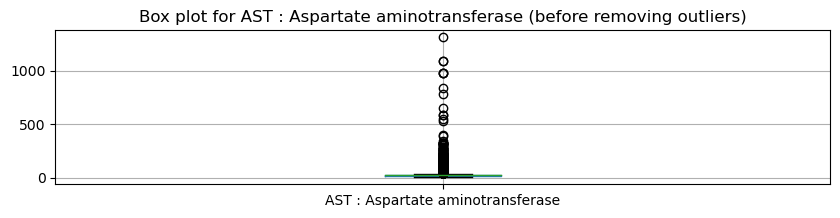

Detected outliers in AST : Aspartate aminotransferase:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
21        26      M   40         180          85       82.0             1.5   
34        41      M   50         170          55       80.0             0.9   
51        62      M   55         175          70       81.5             0.9   
67        83      M   35         160          75       82.3             1.0   
187      242      M   40         165          60       81.0             1.5   
...      ...    ...  ...         ...         ...        ...             ...   
55653  55465      M   30         175         105      108.0             1.5   
55657  55471      M   55         165          75       92.0             0.9   
55668  55569      M   40         170          85       99.1             1.5   
55671  55591      F   60         160          85      109.0             1.0   
55673  55596      M   75         155          45       68.0             0.6 

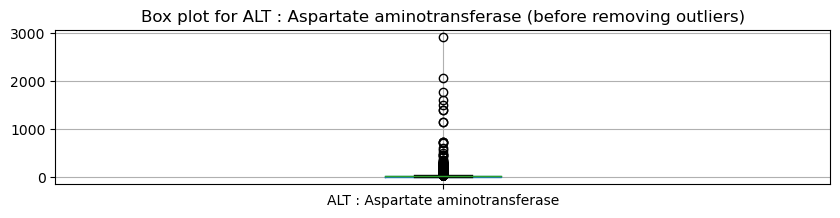

Detected outliers in ALT : Aspartate aminotransferase:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
7          7      M   45         165          90       96.0             1.2   
11        12      M   30         170          75       87.0             1.2   
21        26      M   40         180          85       82.0             1.5   
24        31      M   45         175          80       91.0             1.0   
51        62      M   55         175          70       81.5             0.9   
...      ...    ...  ...         ...         ...        ...             ...   
55641  55430      M   45         175          80       91.0             1.0   
55653  55465      M   30         175         105      108.0             1.5   
55657  55471      M   55         165          75       92.0             0.9   
55668  55569      M   40         170          85       99.1             1.5   
55671  55591      F   60         160          85      109.0             1.0 

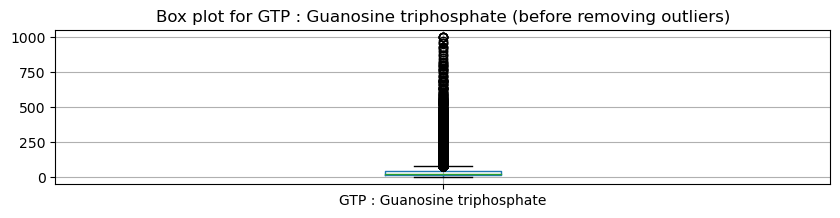

Detected outliers in GTP : Guanosine triphosphate:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
7          7      M   45         165          90       96.0             1.2   
12        13      M   35         170          70       81.0             1.5   
25        32      M   35         180          90       90.0             1.5   
26        33      M   25         175          85       95.4             1.5   
33        40      M   40         170          70       86.0             0.3   
...      ...    ...  ...         ...         ...        ...             ...   
55643  55436      M   60         170          50       79.0             0.7   
55653  55465      M   30         175         105      108.0             1.5   
55654  55466      M   60         170          60       89.0             1.2   
55657  55471      M   55         165          75       92.0             0.9   
55673  55596      M   75         155          45       68.0             0.6   



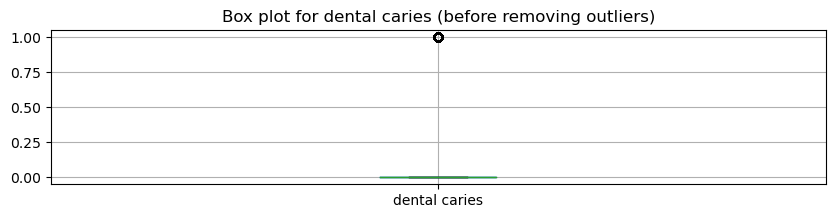

Detected outliers in dental caries:
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
6          6      M   40         160          60       85.5             1.0   
14        15      F   45         165          75      108.0             1.2   
20        23      M   30         170          50       68.0             0.7   
29        36      M   45         170          65       82.0             1.2   
41        51      F   50         160          80       95.0             1.2   
...      ...    ...  ...         ...         ...        ...             ...   
55662  55489      M   55         175          85       99.0             1.5   
55667  55554      F   50         150          60       68.5             0.9   
55671  55591      F   60         160          85      109.0             1.0   
55677  55621      F   50         155          65       86.5             0.8   
55687  55676      F   40         170          65       75.0             0.9   

       eyesight

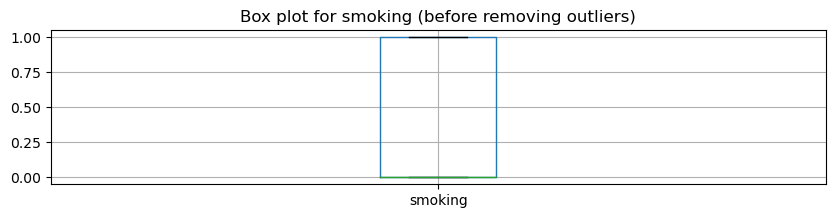

Detected outliers in smoking:
Empty DataFrame
Columns: [ID, gender, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride,  HDL : high-density lipoprotein, LDL : Low-density lipoprotein, hemoglobin, Urine protein, serum creatinine, AST : Aspartate aminotransferase, ALT : Aspartate aminotransferase, GTP : Guanosine triphosphate, oral, dental caries, tartar, smoking]
Index: []


Size before outlier removal: 55692
Size after outlier removal: 24967


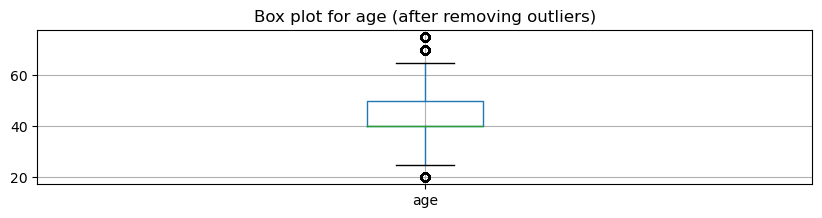

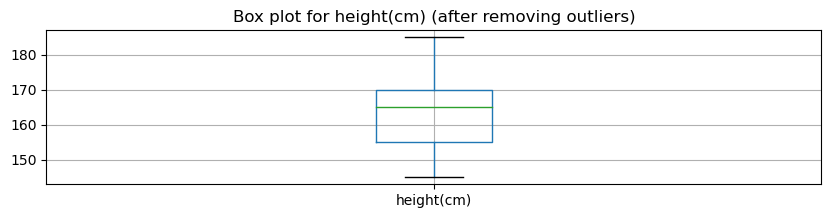

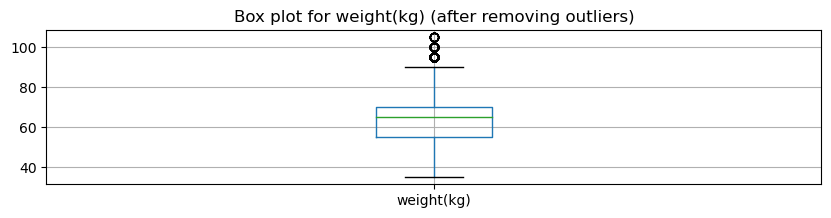

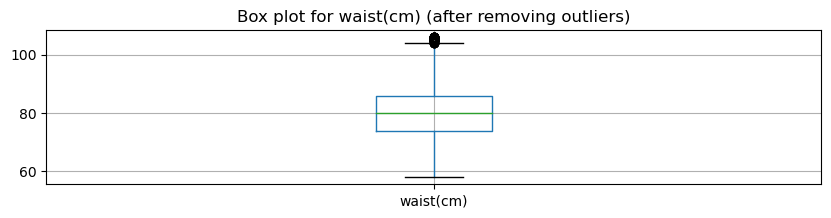

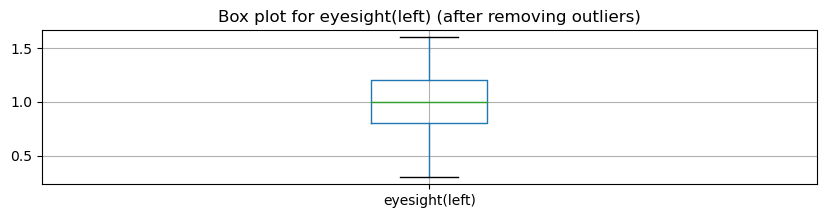

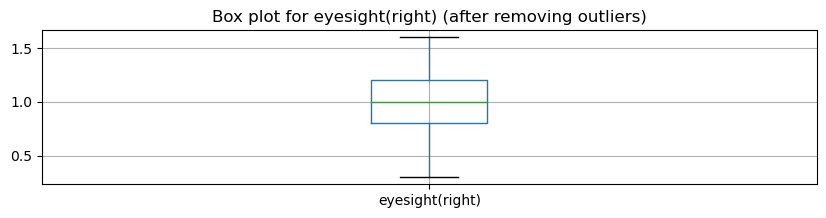

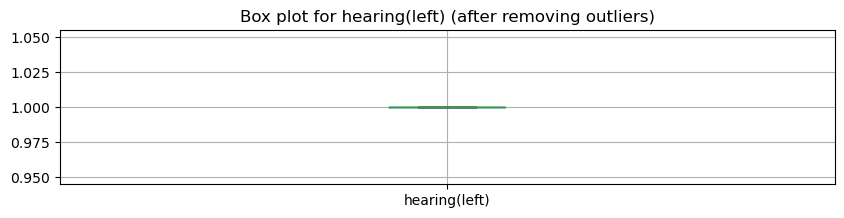

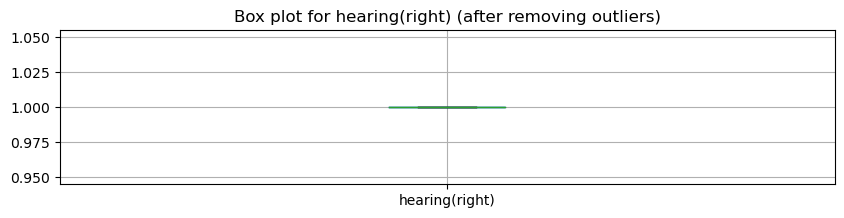

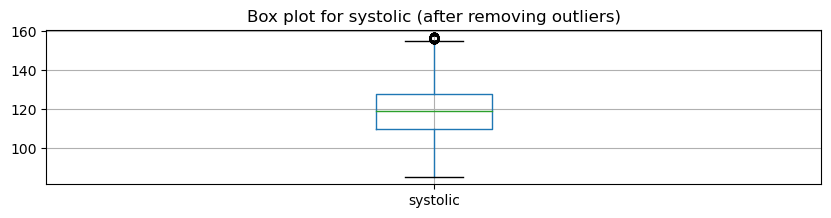

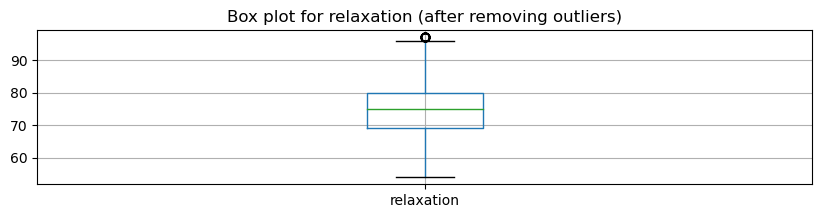

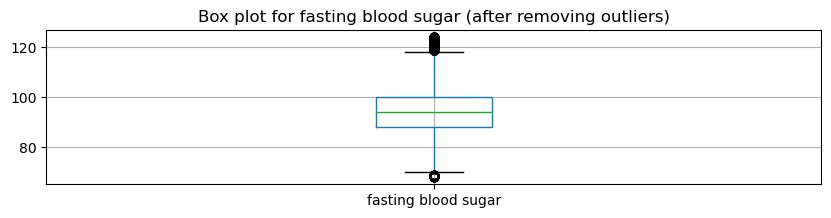

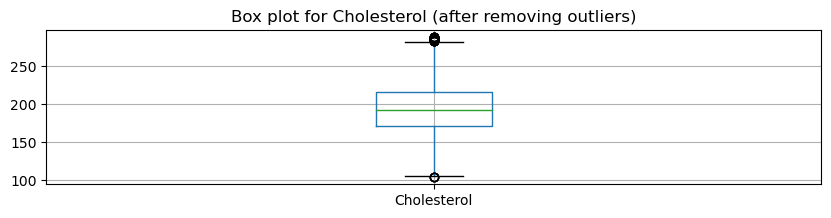

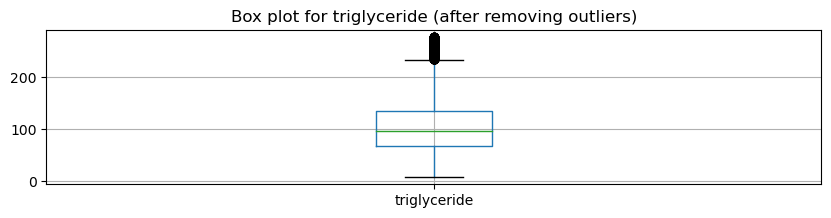

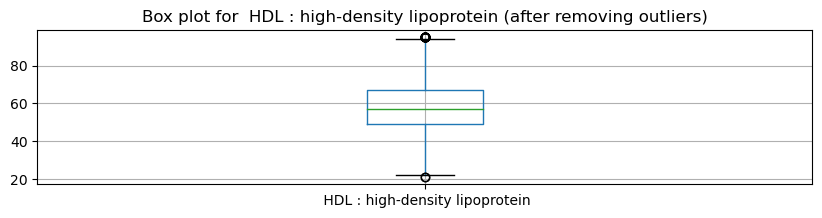

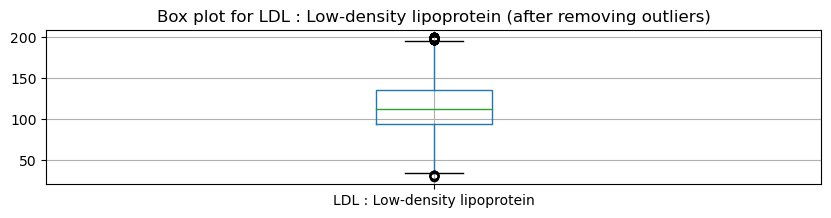

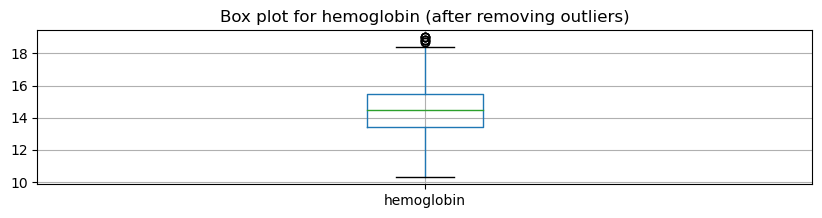

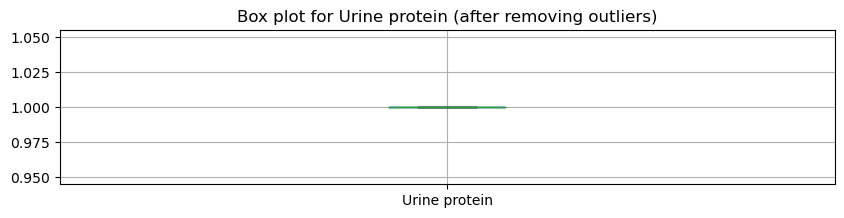

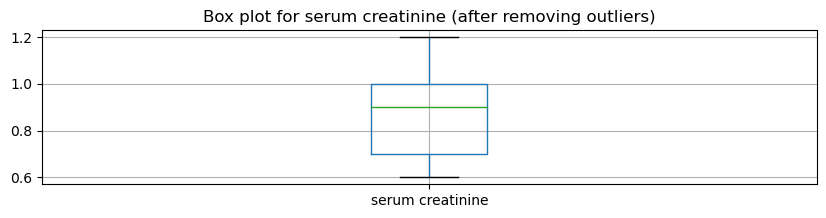

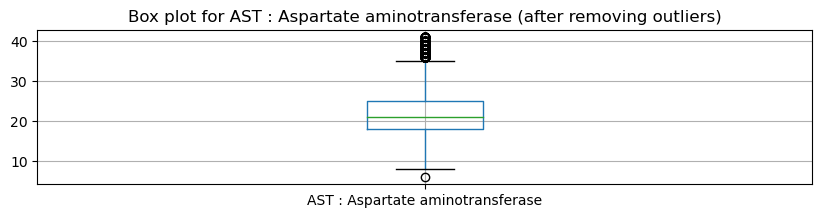

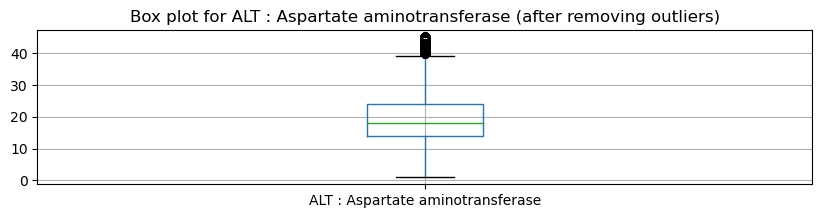

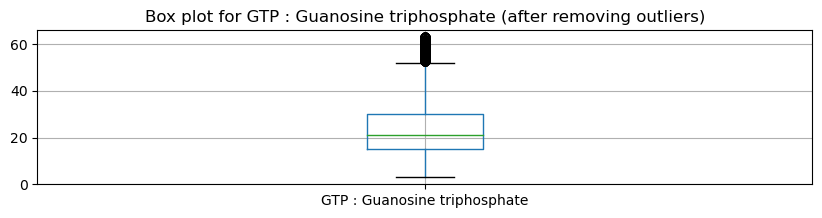

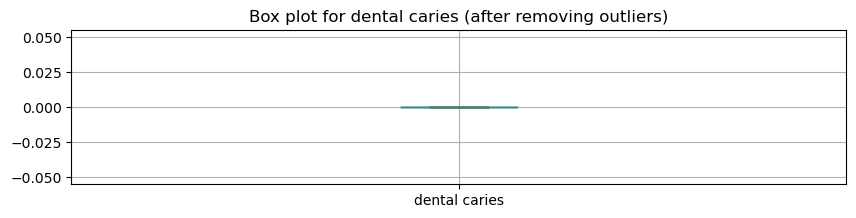

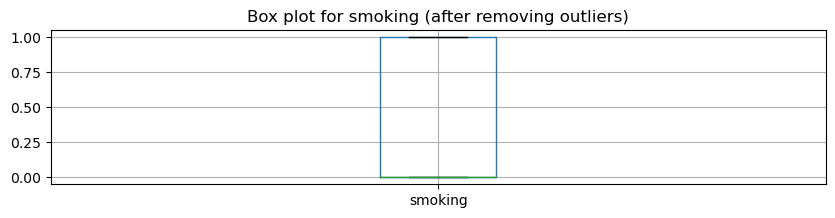

In [10]:

#need to sort outliers using z- score, use trim instead of chopping, iqr instead?? -----------------------------


#print(df.describe())
# data vis -----------------------------------------------------------------------------------------------

#Had no impact on the gb model
# nearly doubled the accuracy for the Neural network



#checking if we have any missing values in our dataset

missing_values_summary = df.isnull().sum()
print("Missing values in each column:\n", missing_values_summary)


# Identify numerical columns (int64 and float64, excluding 'ID' as it's a unique identifier)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('ID')  # Remove 'ID' from the list as it's a unique identifier

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Detect and Visualize Outliers Before Removal
for column in numerical_columns:
    # Detect outliers
    outliers = detect_outliers_iqr(df, column)
    
    # Visualize outliers using box plot
    plt.figure(figsize=(10, 2))
    plt.title(f"Box plot for {column} (before removing outliers)")
    df.boxplot(column=[column])
    plt.show()

    # Print detected outliers
    print(f"Detected outliers in {column}:")
    print(outliers)
    print("\n")

# Record the size of the dataset before removing outliers
size_before = len(df)

# Remove outliers from each numerical column
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

# Record the size of the dataset after removing outliers
size_after = len(df)

# Print comparison
print(f"Size before outlier removal: {size_before}")
print(f"Size after outlier removal: {size_after}")

# Visualize Data After Outlier Removal
for column in numerical_columns:
    # Visualize data after outlier removal using box plot
    plt.figure(figsize=(10, 2))
    plt.title(f"Box plot for {column} (after removing outliers)")
    df.boxplot(column=[column])
    plt.show()
    
    
    

Data splitting and one type encoding  

In [9]:
from sklearn.preprocessing import Normalizer

#one-hot encoding - this will only really apply to SVM and other specific models, not needed with NN
df_encoded = pd.get_dummies(df, columns=['gender', 'oral', 'tartar'], drop_first=True)
X = df_encoded.drop('smoking', axis=1)
y = df_encoded['smoking']




#Step 1: Split the data into training and a temporary set - 80% train 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 2: Further split the temporary set into validation and test sets - 60% test 40% validation
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

#Normalising the dataset 
normalizer = Normalizer()

X_train_normalized = pd.DataFrame(normalizer.fit_transform(X_train), columns=X_train.columns)
X_validation_normalized = pd.DataFrame(normalizer.transform(X_validation), columns=X_validation.columns)
X_test_normalized = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)



#Print shapes of the datasets
print("\n")
print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Test set shape:", X_test_normalized.shape, y_test.shape)
print("Validation set shape:", X_validation_normalized.shape, y_validation.shape)



Training set shape: (44553, 25) (44553,)
Test set shape: (4456, 25) (4456,)
Validation set shape: (6683, 25) (6683,)



# Random Forest

Loading dataset...
Preprocessing data...
Splitting data into training and testing sets...
Training the Random Forest model...
Evaluating the model...
Model Accuracy: 83.17622766855195 %
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.79      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



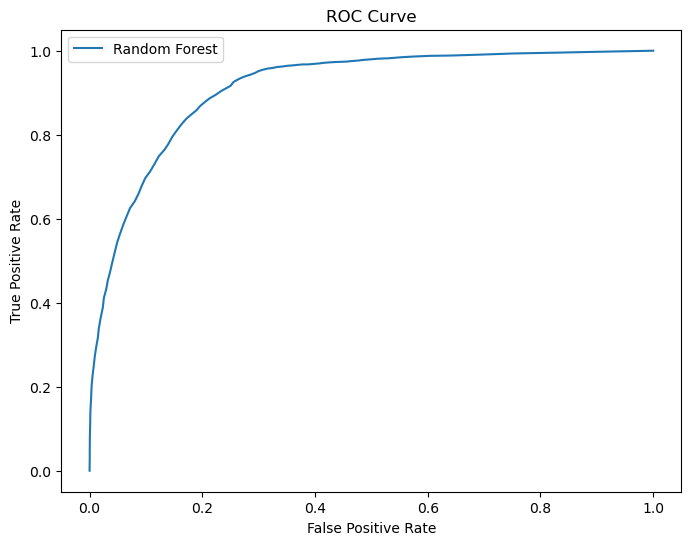

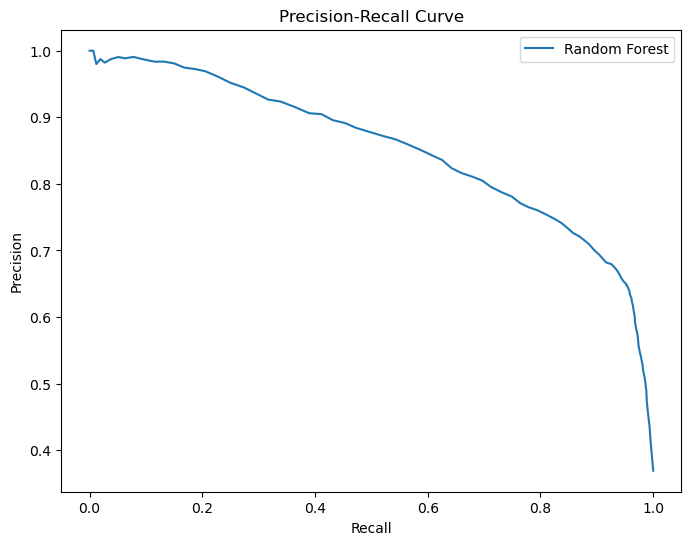

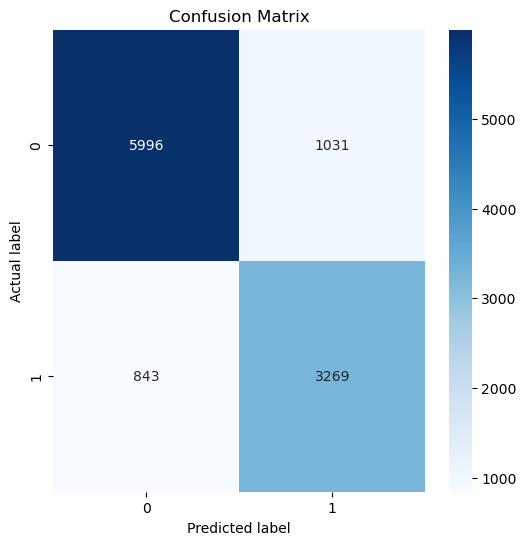

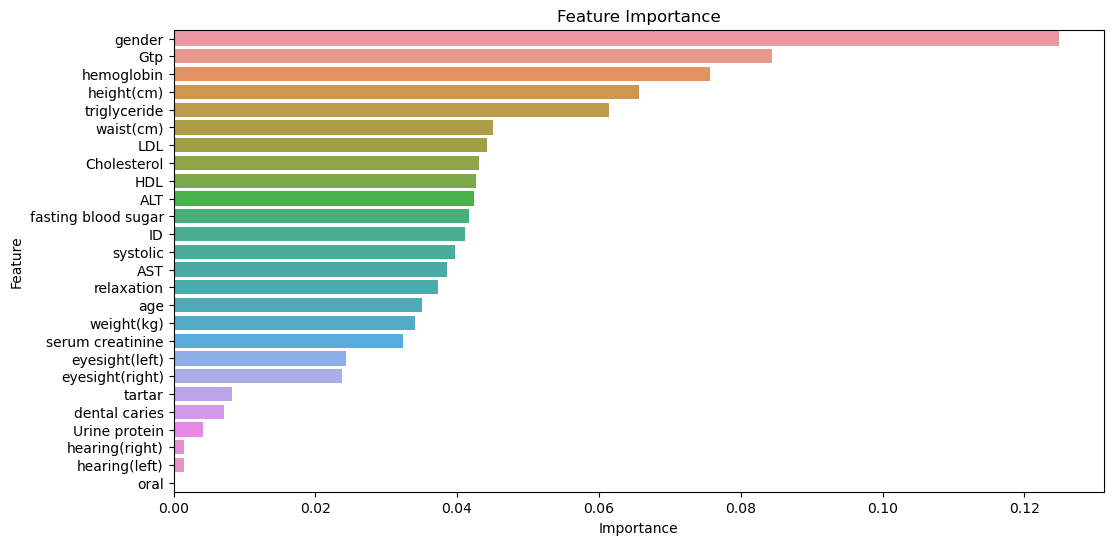

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Load the dataset
print("Loading dataset...")
#file_path = r"C:\Users\haadi\Documents\GitHub\Team project 2\Smoking-Detector-Through-Bio-Signal-\Dataset\smoking.csv"
file_path = "../Dataset/smoking.csv"

df = pd.read_csv(file_path)

# Feature Engineering: Encoding categorical variables
print("Preprocessing data...")
le = LabelEncoder()
categorical_cols = ['gender', 'oral', 'tartar']  # Add other categorical columns as needed
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split the data into features and target variable
X = df.drop('smoking', axis=1)
y = df['smoking']

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
print("Training the Random Forest model...")
Random_Forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
Random_Forest_model.fit(X_train, y_train)

# Evaluating the model
print("Evaluating the model...")
y_pred = Random_Forest_model.predict(X_test)
y_pred_proba = Random_Forest_model.predict_proba(X_test)[:, 1]

# Basic Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy * 100, '%')
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Feature Importance Visualization
feature_importances = Random_Forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()



In [6]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


In [7]:
# Convert input data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(10, activation='relu'))  
model.add(Dense(1, activation='relu'))  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy * 100}%')

#63.08 with the outliers handled
#36.91 without handling the outliers


349/349 [==============================] - 0s 421us/step - loss: 9.6199 - accuracy: 0.3692
Test Loss: 9.619929313659668, Test Accuracy: 36.91534101963043%


# Aadil's model 

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


# Model without early stopping
gbm = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.3, max_depth=10, random_state=65)


gbm.fit(X_train, y_train)
y_pred_proba = gbm.predict_proba(X_validation)[:, 1]


# Predict and print the model on training data
y_train_pred = gbm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Predict and print the model on validation data
y_val_pred = gbm.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predict and print the model on validation data
y_test_pred = gbm.predict(X_test)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {val_accuracy * 100:.2f}%")




Training Accuracy: 100.00%
Validation Accuracy: 83.33%
Test Accuracy: 82.34%


In [ ]:
#Grid search
"""
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators':  [125, 150, 175, 200, 225, 250, 275, 300, 500, 750, 1000],
    'learning_rate': [0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'max_depth':  [3, 4, 5, 6, 7, 8, 9, 10]
}

# Initialize the GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Iterate over all combinations of parameters
for params in ParameterGrid(param_grid):
    # Set the parameters
    gbm.set_params(**params)
    
    # Fit the model
    gbm.fit(X_train, y_train)
    
    # Predict and evaluate on training data
    y_train_pred = gbm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict and evaluate on validation data
    y_val_pred = gbm.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    
    # Print the results
    print(f"Params: {params}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
    print("-" * 40)
    
"""

In [ ]:
#code for cross validation
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

"""
# k fold - to see if model is truly overfitting
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=65)
accuracies = []


for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    # Split data
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the GBM model
    gbm.fit(X_train_fold, y_train_fold)

    # Predict and evaluate
    y_val_pred = gbm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy)

    # Print accuracy for the current fold
    print(f"Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%")

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across all folds: {average_accuracy * 100:.2f}%")
"""


In [ ]:
#GBM with early stopping:
"""
# Model with early stopping
gbm_es = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.3, max_depth=10, validation_fraction=0.3, n_iter_no_change=10, tol=0.01, random_state=65)
gbm_es.fit(X_train, y_train)

# Predict and print the model on training data
y_train_pred_es = gbm_es.predict(X_train)
train_accuracy_es = accuracy_score(y_train, y_train_pred_es)
print(f"Training Accuracy with Early Stopping: {train_accuracy_es * 100:.2f}%")

# Predict and print the model on validation data
y_val_pred_es = gbm_es.predict(X_validation)
val_accuracy_es = accuracy_score(y_validation, y_val_pred_es)
print(f"Validation Accuracy with Early Stopping: {val_accuracy_es * 100:.2f}%")#
"""

GBM model analysis 

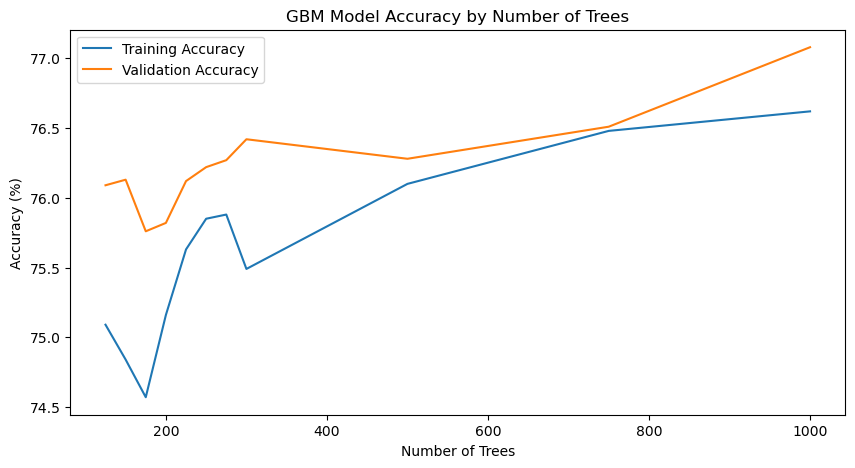

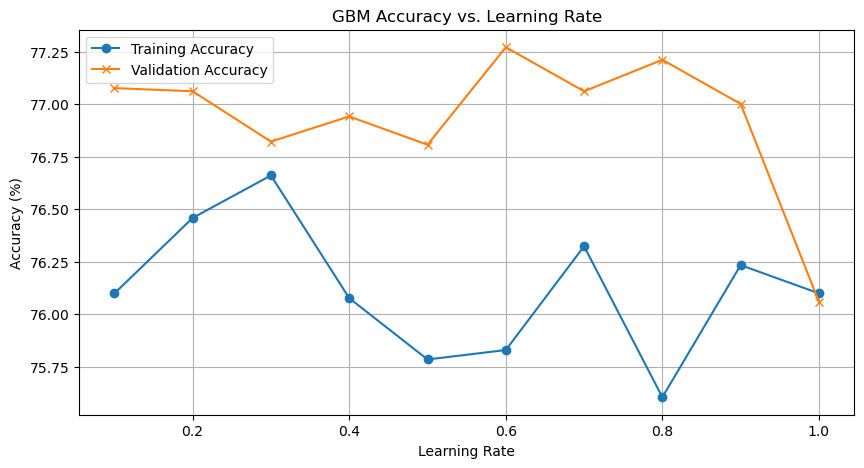

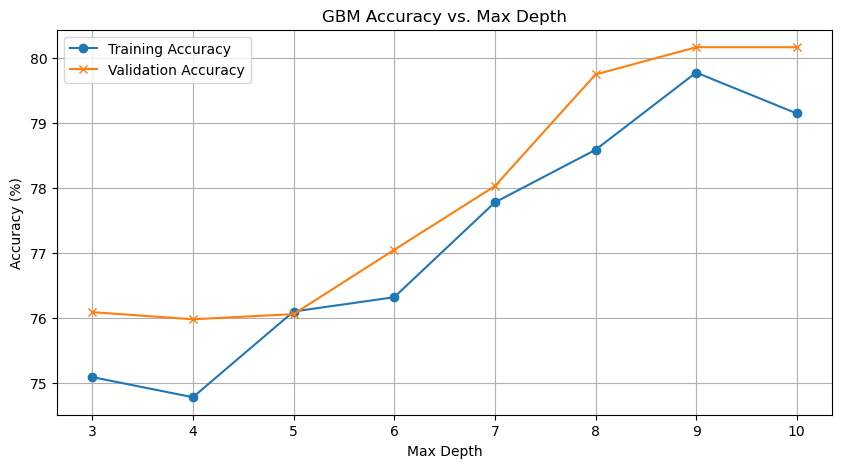

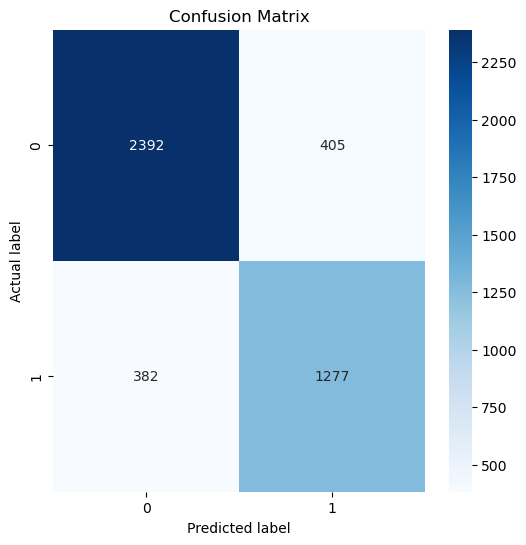

Error Rate: 0.17661579892280072
Precision: 0.7592152199762188
Recall: 0.7697408077154912
Specificity: 0.8552020021451555
F1 Score: 0.7644417838970369


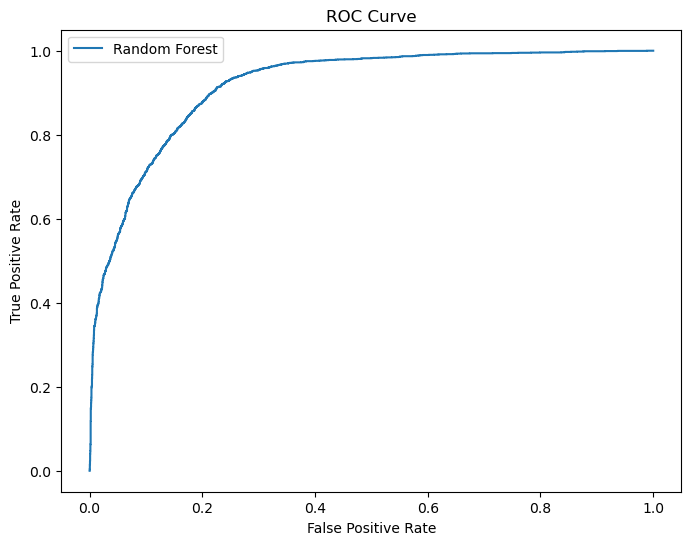

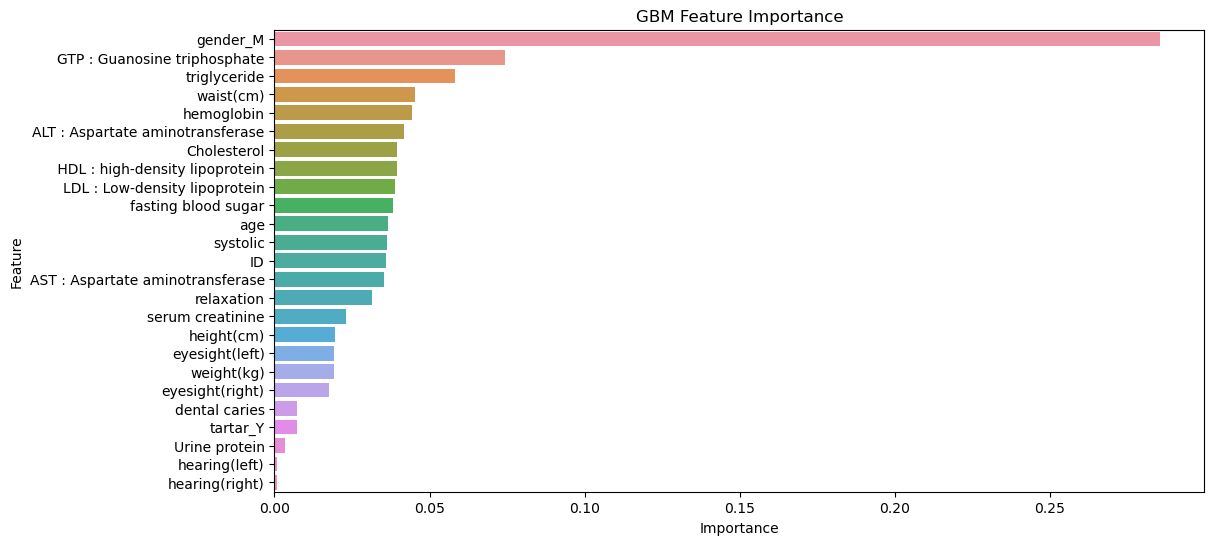

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


#Changing the the Number of trees 


n_trees = [125, 150, 175, 200, 225, 250, 275, 300, 500, 750, 1000]
train_accuracies = [75.09, 74.84, 74.57, 75.16, 75.63, 75.85, 75.88, 75.49, 76.10, 76.48, 76.62]
val_accuracies = [76.09, 76.13, 75.76, 75.82, 76.12, 76.22, 76.27, 76.42, 76.28, 76.51, 77.08]
#decide if you want more values for this and the gaps betwen each..


plt.figure(figsize=(10, 5))
plt.plot(n_trees, train_accuracies, label='Training Accuracy')
plt.plot(n_trees, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (%)')
plt.title('GBM Model Accuracy by Number of Trees')
plt.legend()
plt.show()
    
    
# Data from your learning rate changes
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
accuracies = [76.0996, 76.4587, 76.6607, 76.0772, 75.7855, 75.8303, 76.3241, 75.6059, 76.2343, 76.10]
validation_accuracies = [77.0762, 77.0612, 76.8218, 76.9415, 76.8068, 77.2707, 77.0612, 77.2108, 77.0013, 76.06]

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, accuracies, label='Training Accuracy', marker='o')
plt.plot(learning_rates, validation_accuracies, label='Validation Accuracy', marker='x')
plt.title('GBM Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
    

# Data from your max depth changes
max_depths = [3, 4, 5, 6, 7, 8, 9, 10]
accuracies = [75.09, 74.78, 76.10, 76.32, 77.78, 78.59, 79.78, 79.15]
validation_accuracies = [76.09, 75.98, 76.06, 77.05, 78.03, 79.75, 80.17, 80.17]

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, validation_accuracies, label='Validation Accuracy', marker='x')
plt.title('GBM Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix
#changed this to the test, so now it's for test 
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



# Calculate metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Error Rate
error_rate = (FP + FN) / float(TP + TN + FP + FN)
print(f'Error Rate: {error_rate}')


# Precision
precision = TP / float(TP + FP)
print(f'Precision: {precision}')


# Recall
recall = TP / float(TP + FN)
print(f'Recall: {recall}')


# Specificity
specificity = TN / float(TN + FP)
print(f'Specificity: {specificity}')


# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1}')



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




# Get feature importances
feature_importances = gbm.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Feature Importance Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('GBM Feature Importance')
plt.show()

## Taha 

## SVM

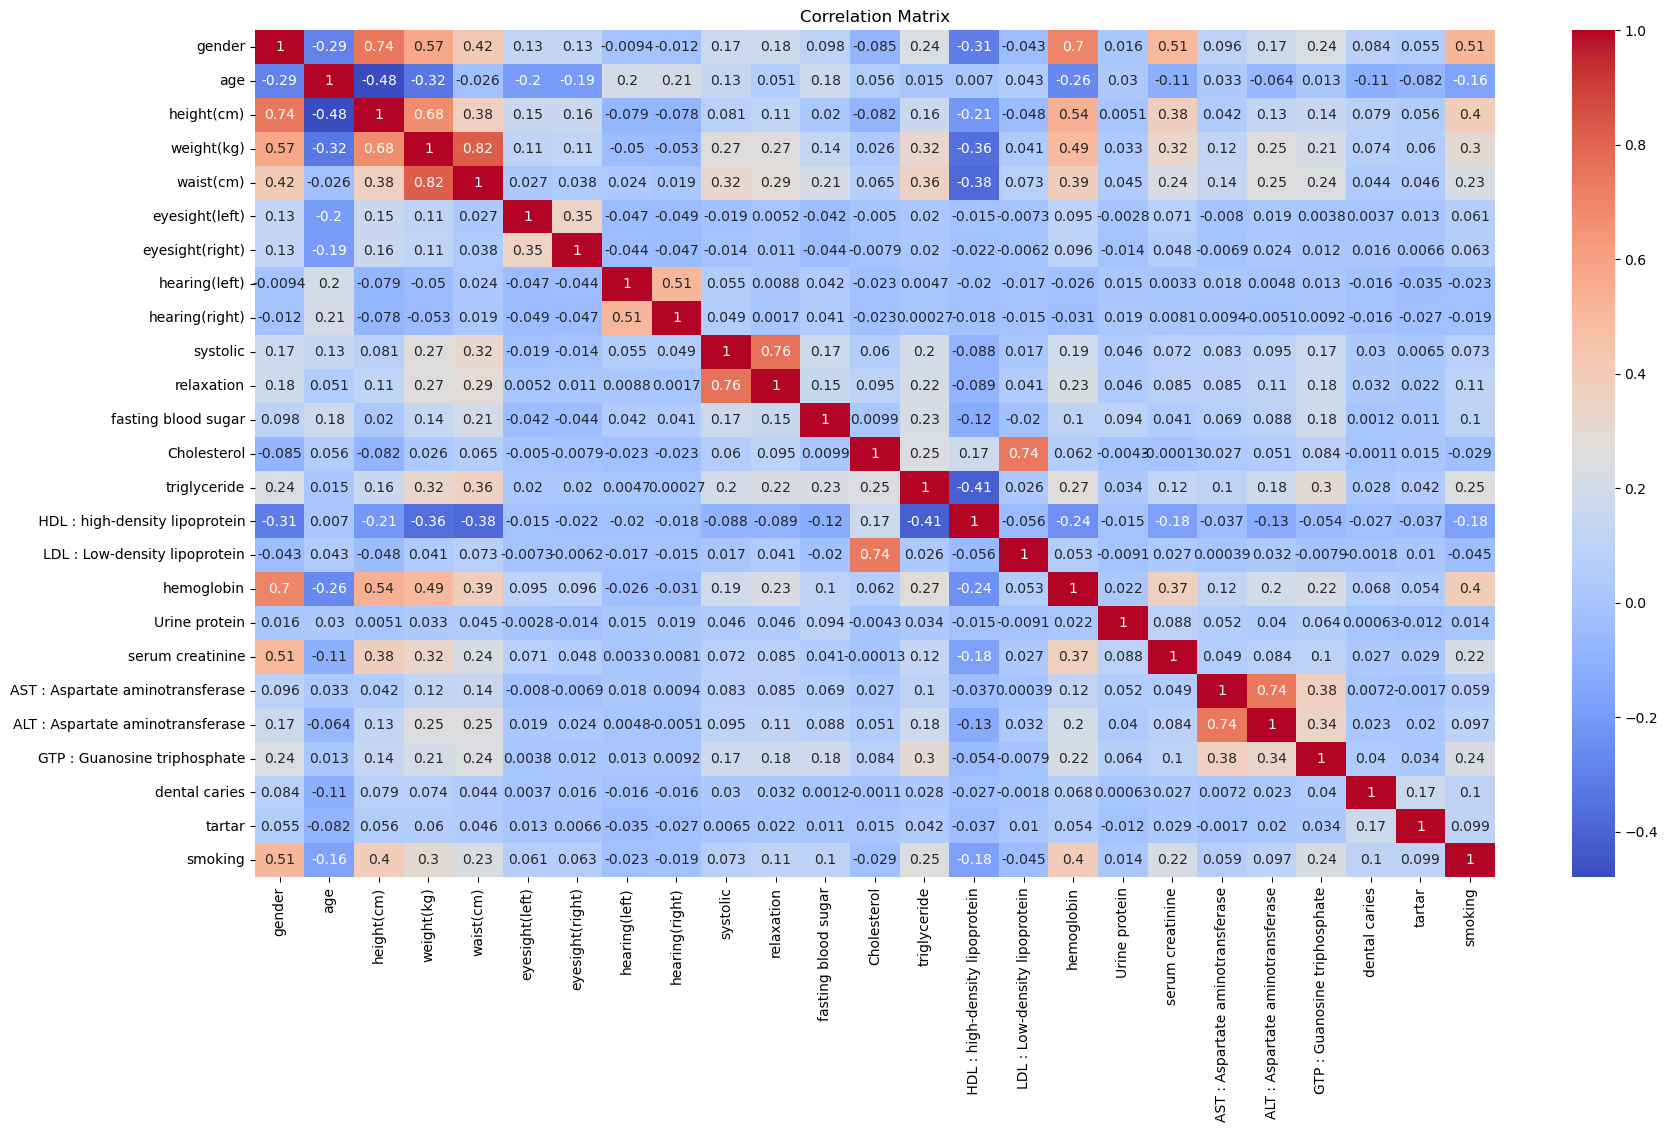

In [10]:
# run this cell and the following cells (if there is an error rerun this cell after running the 2nd cell)
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../Dataset/smoking.csv")


# Droppig the ID column
df.drop('ID', axis=1, inplace=True)

#Removing the NaN values
df= df.dropna(subset=["LDL","hemoglobin","Urine protein","serum creatinine","serum creatinine", "AST","ALT","Gtp","oral", "dental caries","tartar","smoking" ] )
df.isna().sum()

# added the full name of the abbreviations, so we know what they stand for.
df = df.rename(columns={'HDL':' HDL : high-density lipoprotein', 'LDL': 'LDL : Low-density lipoprotein',
                        'AST':'AST : Aspartate aminotransferase', 'ALT': 'ALT : Aspartate aminotransferase',
                        'Gtp': 'GTP : Guanosine triphosphate'})

# mapping the gender, tartar and oral to binary values (0 and 1)
gender_map = {'M':1, 'F':0}
oral_map = {'Y':1, 'N':0}
tartar_map = {'Y':1, 'N':0}
df['gender'] = df['gender'].map(gender_map)
df['tartar'] = df['tartar'].map(tartar_map)
df['oral'] = df['oral'].map(oral_map)
df.head(2)


# Calculate correlation matrix excluding 'oral' column
correlation_matrix = df.drop(['oral'],axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Split the and Train the SVM Model



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



# Assuming 'target' is your target variable
X = df.drop(columns=['smoking'])  # Extracting features
y = df['smoking']  # Extracting target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train.shape:', X_train.shape, 'X_test.shape:', X_test.shape, 'y_train.shape:', y_train.shape, 'y_test.shape:', y_test.shape, '\n\n')

#Train model using SVC
C_value = 3.0
svm_model = SVC(kernel='rbf',C=C_value)
svm_model.fit(X_train, y_train)

#predict using svm model train above
svm_unseen_data_prediction = svm_model.predict(X_test)

X_train.shape: (44553, 25) X_test.shape: (11139, 25) y_train.shape: (44553,) y_test.shape: (11139,) 




# Model Analysis

## Classification Metrics
Metrics used for Ananlysis are:      
accuracu, prcision, f1 score, recall score
Confusion Matrix, ROC curve

Accuracy of SVM using the test/unseen data: 0.731663524553371
Precision of SVM using the test/unseen data: 0.6578577452909755
Recall of SVM using the test/unseen data: 0.5690661478599222
F1 of SVM using the test/unseen data: 0.6102490546355457
Error_Rate: 0.268336475446629


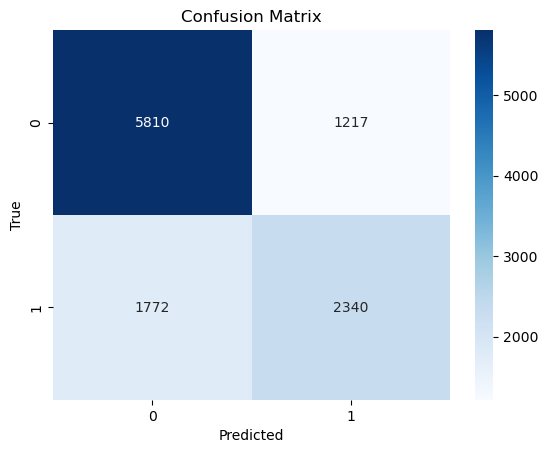

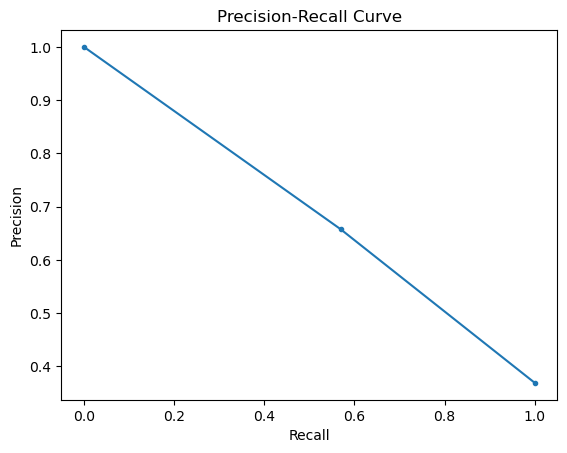

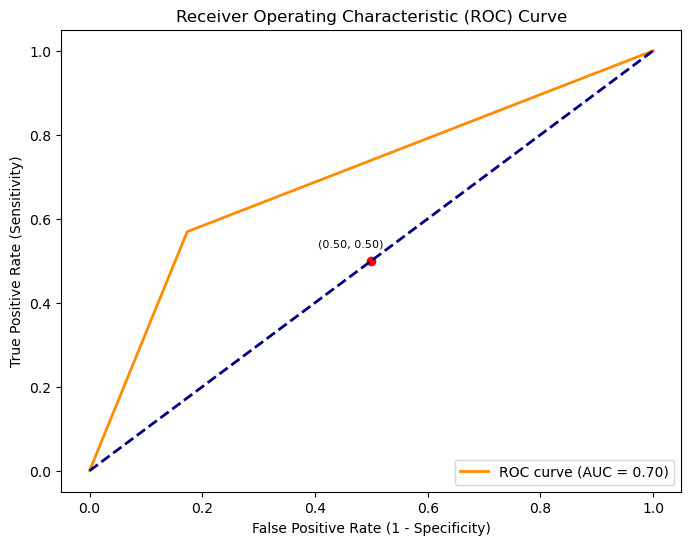

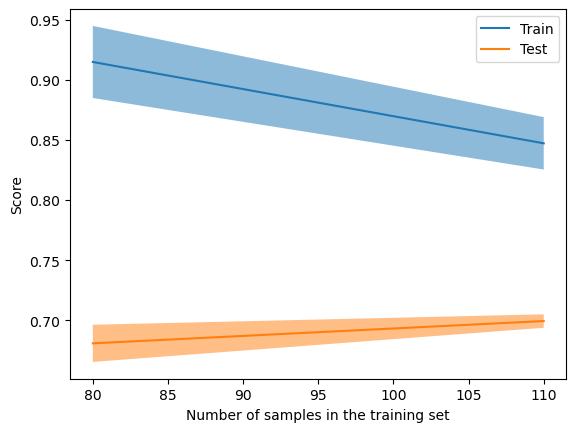

In [12]:

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle

unseen_data_accuracy_result = accuracy_score(y_test, svm_unseen_data_prediction)
print(f"Accuracy of SVM using the test/unseen data: {unseen_data_accuracy_result}")

useen_data_precision_result = precision_score(y_test,svm_unseen_data_prediction )
print(f"Precision of SVM using the test/unseen data: {useen_data_precision_result}")

unseen_data_recall_result = recall_score(y_test, svm_unseen_data_prediction)
print(f"Recall of SVM using the test/unseen data: {unseen_data_recall_result}")

unseen_data_f1_result = f1_score(y_test, svm_unseen_data_prediction)
print(f"F1 of SVM using the test/unseen data: {unseen_data_f1_result}")

unseen_data_accuracy_result = accuracy_score(y_test, svm_unseen_data_prediction)
error_rate = 1 - unseen_data_accuracy_result
print(f"Error_Rate: {error_rate}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_unseen_data_prediction)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, svm_unseen_data_prediction)
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Assuming we have fpr, tpr, and roc_auc obtained from your model
# fpr: False Positive Rate
# tpr: True Positive Rate
# roc_auc: Area under the ROC curve

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, svm_unseen_data_prediction)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Adding annotation for the optimal threshold (example)
optimal_threshold = 0.5  # Replace with your optimal threshold value
plt.scatter(1 - optimal_threshold, optimal_threshold, marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold})')
plt.annotate(f'({1 - optimal_threshold:.2f}, {optimal_threshold:.2f})',
             (1 - optimal_threshold, optimal_threshold),
             textcoords="offset points", xytext=(-15,10), ha='center', fontsize=8)


X, y = shuffle(X_train, y_train, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)



# Neural Network 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

#Importing the dataset
dataset_file = "../Dataset/smoking.csv"
df = pd.read_csv(dataset_file)

# Identify numerical columns (int64 and float64, excluding 'ID' as it's a unique identifier)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('ID')  # Remove 'ID' from the list as it's a unique identifier


# One-hot encode categorical variables and handle missing values
df_encoded = pd.get_dummies(df, columns=['gender', 'oral', 'tartar'], drop_first=True)
df_encoded = df_encoded.dropna()


# Prepare input features (X) and target variable (y)
X = df_encoded.drop('smoking', axis=1)
y = df_encoded['smoking']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Convert the target variable to categorical
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Convert input data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Build a Neural Network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-01-14 12:34:11.818605: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-14 12:34:11.874647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 12:34:11.874686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 12:34:11.876492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alre


Training set shape: (44553, 25) (44553,)
Test set shape: (11139, 25) (11139,)
Epoch 1/100
557/557 [==============================] - 5s 5ms/step - loss: 1.3595 - accuracy: 0.5809 - val_loss: 0.9142 - val_accuracy: 0.6325
Epoch 2/100
557/557 [==============================] - 2s 4ms/step - loss: 0.7612 - accuracy: 0.6483 - val_loss: 0.6652 - val_accuracy: 0.6889
Epoch 3/100
557/557 [==============================] - 2s 4ms/step - loss: 0.6236 - accuracy: 0.6741 - val_loss: 0.5785 - val_accuracy: 0.7009
Epoch 4/100
557/557 [==============================] - 2s 4ms/step - loss: 0.5912 - accuracy: 0.6832 - val_loss: 0.5707 - val_accuracy: 0.7005
Epoch 5/100
557/557 [==============================] - 2s 4ms/step - loss: 0.5772 - accuracy: 0.6909 - val_loss: 0.5396 - val_accuracy: 0.7090
Epoch 6/100
557/557 [==============================] - 2s 4ms/step - loss: 0.5707 - accuracy: 0.6959 - val_loss: 0.5872 - val_accuracy: 0.6858
Epoch 7/100
557/557 [==============================] - 2s 4ms/s

## Graphs

349/349 [==============================] - 1s 2ms/step - loss: 0.4949 - accuracy: 0.7336
Test Loss: 0.4949027895927429, Test Accuracy: 73.36385846138%
349/349 [==============================] - 1s 2ms/step


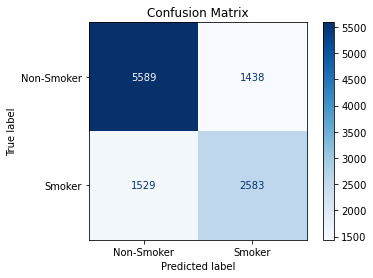

349/349 [==============================] - 1s 2ms/step
Final score (RMSE): 0.4068869352340698


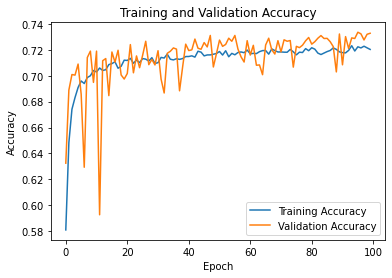

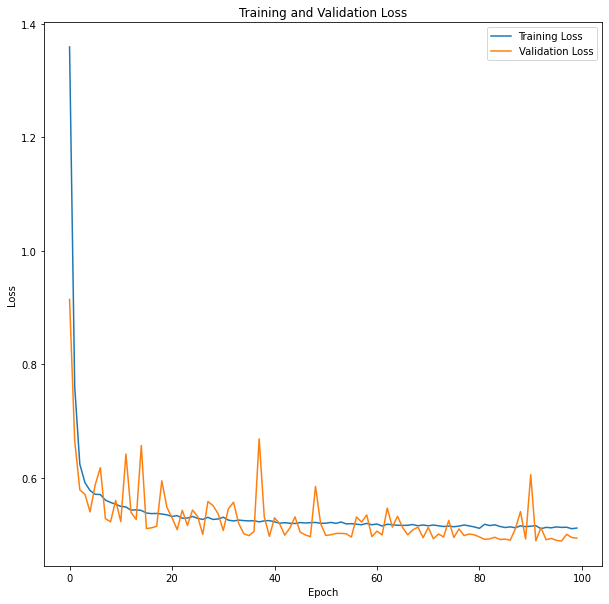

In [2]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy * 100}%')

# Get model predictions on the test set
pred = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Smoker', 'Smoker'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Measure RMSE error.
pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show(block=False)

# Plot training and validation loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()